In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd = os.getcwd()
data_wd = pwd+"/Dataset_Question1/"
batch_size = 10 
total_people = 15
total_images = batch_size*total_people
d1 = 64
d2 = 64
F = np.zeros((d1, d2, total_images))
for batch in range(total_people):
    os.chdir(data_wd+str(batch+1))
    names = sorted(glob.glob("*.pgm"))
    names = sorted(names,key=lambda x: int(os.path.splitext(x)[0]))
    d1, d2 = plt.imread(names[0]).shape
    num = len(names)
    for n, i in enumerate(names):
        F[:, :, batch*batch_size+n] = (plt.imread(i,0).astype(np.double)) / 255.
    os.chdir(pwd)
F = F.reshape(d1 * d2, batch_size * total_people)
clip = 10
print(F.shape)
print(d1)
print(d2)
os.chdir(pwd)


(4096, 150)
64
64


In [3]:
F_average = np.zeros(d1*d2)
F_average = np.mean(F,axis=1)
A = np.zeros((d1*d2,total_images))
for i in range(total_images):
    A[:,i] = F[:,i] -F_average[:] 

In [4]:
u, s, vh = np.linalg.svd(A, full_matrices=True)

In [5]:
U_selected = u

In [6]:
def show_fig(image):
    plt.figure()
    plt.imshow(np.reshape(image,(d1,d2)))

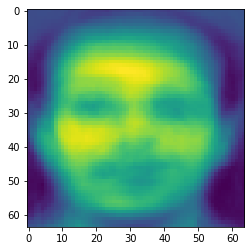

In [7]:
# Having a look at the average face
show_fig(F_average)

In [8]:
U_selected = np.transpose(u)

In [9]:
err_arr = []
RepresentativeImages = np.zeros((d1*d2,total_people))
for people in range(total_people):
    err_arr = []
    for batch in range(batch_size):
        error = np.linalg.norm(np.dot(U_selected,F[:,batch+people*batch_size]-F_average))
        err_arr.append(error)
    min_error_indx = err_arr.index(min(err_arr))
    RepresentativeImages[:,people] = F[:,min_error_indx + people*batch_size]-F_average

In [10]:
X = np.dot(U_selected,RepresentativeImages)
X.shape

(4096, 15)

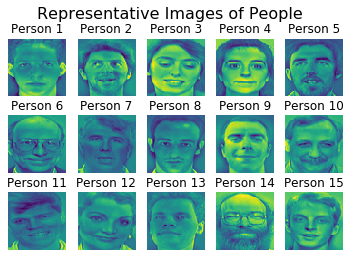

In [32]:
# Representative images of the people
fig, ax = plt.subplots(nrows=3, ncols=5)
fig.suptitle("Representative Images of People",fontsize = 16)
axn = ax.flatten()
PeopleID = 0 
for axes in axn:
    axes.imshow(np.reshape(RepresentativeImages[:,PeopleID],(d1,d2)))
    PeopleID += 1 
    axes.axis('off')
    axes.title.set_text("Person "+str(PeopleID))
plt.show()

In [11]:
def test_FaceReg(FileName):
    test_image = (plt.imread(str(FileName)+".pgm",0).astype(np.double)) / 255.
    #show_fig(test_image)
    test_image = np.reshape(test_image,(d1*d2))
    test_x = np.dot(U_selected,test_image-F_average)
    err_arr = []
    for people in range(total_people):
        error = np.linalg.norm(test_x-X[:,people])
        err_arr.append(error)
    Identity = err_arr.index(min(err_arr)) + 1
    #show_fig(RepresentativeImages[:,Identity-1])
    return Identity

In [12]:
Predictions = []
for people in range(total_people):
    os.chdir(data_wd+str(people+1))
    for batch in range(batch_size):
        Predictions.append(test_FaceReg(str(batch+1)))
np.asarray(Predictions)

array([ 1,  6,  1,  6,  6,  1,  1,  1,  6,  6,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  9,  9,  5,  5,  9,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  9,  7,  9,  9,  7,  9,  7,  7,
        7,  7,  8,  8,  8,  6,  6,  9,  8,  1,  1,  8, 13, 12,  6,  9,  9,
        6,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11,  7, 12,  7, 12, 15, 12, 12, 12, 15,
       15,  2,  2,  2,  2,  2, 13, 13,  2, 13, 13, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 15, 15, 15, 15, 15, 10, 15, 15, 15, 15])

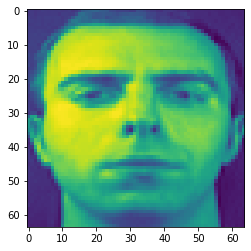

In [13]:
show_fig(F[:,84])

In [14]:
test_image = (F[:,1])
#show_fig(test_image)
test_image = np.reshape(test_image,(d1*d2))
test_x = np.dot(U_selected,test_image-F_average)
err_arr = []
for people in range(total_people):
    error = np.linalg.norm(test_x-X[:,people])
    err_arr.append(error)
Identity = err_arr.index(min(err_arr)) + 1
print(Identity)

6


In [15]:
Result = np.zeros((total_people, batch_size))
for people in range(total_people):
    Result[people,:] = people + 1
Result = np.reshape(Result,(total_images))

In [16]:
Score = np.equal(Predictions,Result)
Score = np.sum(Score)
print("Number of images correctly mapped out of 150 images = {}".format(Score))

Number of images correctly mapped out of 150 images = 117
